# Binary Classification Project : Customer Happiness

## Project Overview:

This project is to build a model that predicts what makes our customers happy or unhappy.The answers for below  questions are recorded
    <br>1. X1 = my order was delivered on time
    <br>2. X2 = contents of my order was as I expected
    <br>3. X3 = I ordered everything I wanted to order
    <br>4. X4 = I paid a good price for my order
    <br>5. X5 = I am satisfied with my courier
    <br>6. X6 = the app makes ordering easy for me
<br>    
The responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer. The goal of the model will be to predict if the customer will be happy(1) or unhappy(0).

## Data Setup:

In [1]:
# Import all the required libraries
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score , ConfusionMatrixDisplay
import pickle

Set path for data file source to access the data records and set the random seed.

In [2]:
input_dir = os.path.abspath('')
data_file = os.path.join(input_dir, "Data", "Survey2020" + ".csv")
# Set the random seed value
seed_value = 2121
# Set random seed in python env 
os.environ['PYTHONHASHSEED'] = str(seed_value)
# Set random seed value
random.seed(seed_value)
# Set numpy random seed 
np.random.seed(seed_value)

**Step 1. Load the data into pandas dataframe using read_csv method.**

In [3]:
pd_df_data = pd.read_csv(data_file)

## Exploratory Data Analysis:


**Step 2. Generate a histogram to understand the distribution of class labels in datasets.**

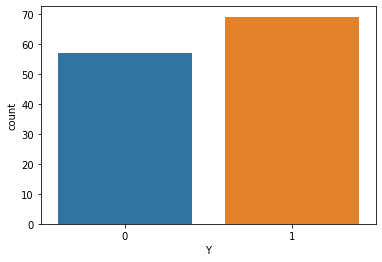

In [4]:
# Plot the class labels to understand the class data distribution
ax = sns.countplot(x = 'Y',data = pd_df_data)


From the histogram plot we can see that the dataset is slightly disbalanced. 

**Step 3. Let's explore the distribution for all the features and labels individually.**

In [5]:
pd_df_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


**Step 4. Data analysis to check for outliers**

The boxplot will give us visibility if we have any outliers or not.

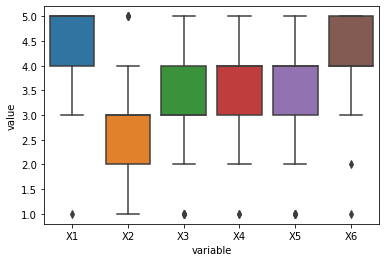

In [6]:
# Plot the boxplot to visualize the outliers
sns.boxplot(x="variable", y="value", 
            data=pd.melt(pd.DataFrame(data=pd_df_data,columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])))

plt.show()

From the above plot distribution we can see there are outliers observed in all the features. These outliers might impact our model. 


**Step 5. Let's check what % of data points in the given dataset are outliers.**

In [7]:
# List for collecting the indexes of outliers
lst_outlier_indexes = []

# Iterate through all features and calculate 
for char_var in [ 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']:
    
    var_summary =pd_df_data[char_var].describe()
    int_iqr = 1.5 * (var_summary['75%'] - var_summary['25%'])
    lst_temp = np.where( (pd_df_data[char_var] > (var_summary['75%'] + int_iqr))|\
                        (pd_df_data[char_var] < (var_summary['25%'] - int_iqr) ))[0].tolist()
    lst_outlier_indexes.extend(lst_temp)

In [8]:
print("Class 0 :", sum(pd_df_data.loc[lst_outlier_indexes,'Y'] == 0))
print("Class 1 :", sum(pd_df_data.loc[lst_outlier_indexes,'Y'] == 1))

Class 0 : 13
Class 1 : 12


In [9]:
flt_outlier_percentage = (len(lst_outlier_indexes)/len(pd_df_data) ) * 100
print("outlier percentage " , np.round(flt_outlier_percentage,3), "%")

outlier percentage  19.841 %


**Step 6. Store filtered data in another dataset.**

At this point we are not sure if these outliers are clerical errors or correct data points, so we will just filter out the records and create another dataset for future purposes(if needed).

In [10]:
# Remove the outlier records 
pd_df_data_filtered = pd_df_data.drop(lst_outlier_indexes)

# Store the filtered records in another dataset
pd_df_data_filtered.to_csv(os.path.join(input_dir,"Data", "Survey2020_filtered" + ".csv"))

## Generate Features And Labels:

**Step 7. Normalize the features and generate test and train datasets.**

In [11]:
# Allocate features and labels
features = pd_df_data.loc[:, ['X1','X2','X3','X4','X5','X6']]
labels = np.ravel(pd_df_data.loc[: , ['Y']])

# Split the dataset 
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, 
                                                                         test_size=0.3, random_state=seed_value)
# Transform the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on train feature set
features_train = scaler.fit_transform(features_train)

# Transform the test feature set
features_test = scaler.transform(features_test)

## Identifying and Training Machine Learning Model:


**Step 8. Use LazyClassifier to understand the best model that we can use.**

#call the lazy classifier<br>
clf = LazyClassifier(verbose=1,ignore_warnings=True, custom_metric=None, random_state = seed_value)<br>
models,predictions = clf.fit(features_train, features_test, labels_train, labels_test)<br>
<br>
Results:
<br>
7%|▋         | 2/29 [00:00<00:01, 15.66it/s]{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6052631578947368, 'Balanced Accuracy': 0.5916666666666667, 'ROC AUC': 0.5916666666666668, 'F1 Score': 0.5757250268528464, 'Time taken': 0.0959017276763916}<br>
{'Model': 'BaggingClassifier', 'Accuracy': 0.5789473684210527, 'Balanced Accuracy': 0.5777777777777777, 'ROC AUC': 0.5777777777777778, 'F1 Score': 0.5789473684210527, 'Time taken': 0.030726194381713867}<br>
{'Model': 'BernoulliNB', 'Accuracy': 0.7105263157894737, 'Balanced Accuracy': 0.7055555555555556, 'ROC AUC': 0.7055555555555556, 'F1 Score': 0.7074663402692778, 'Time taken': 0.018073558807373047}<br>
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.47368421052631576, 'Balanced Accuracy': 0.4583333333333333, 'ROC AUC': 0.4583333333333333, 'F1 Score': 0.42510121457489874, 'Time taken': 0.033364295959472656}<br>
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.6052631578947368, 'Balanced Accuracy': 0.5972222222222222, 'ROC AUC': 0.5972222222222222, 'F1 Score': 0.5953593661573289, 'Time taken': 0.012360572814941406}<br>
{'Model': 'DummyClassifier', 'Accuracy': 0.47368421052631576, 'Balanced Accuracy': 0.46944444444444444, 'ROC AUC': 0.46944444444444444, 'F1 Score': 0.4707356626861271, 'Time taken': 0.012344121932983398}<br>
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.5263157894736842, 'Balanced Accuracy': 0.5194444444444445, 'ROC AUC': 0.5194444444444444, 'F1 Score': 0.5182416267942583, 'Time taken': 0.012706518173217773}<br>
 52%|█████▏    | 15/29 [00:00<00:00, 33.94it/s]<br>
 {'Model': 'ExtraTreesClassifier', 'Accuracy': 0.5789473684210527, 'Balanced Accuracy': 0.5694444444444444, 'ROC AUC': 0.5694444444444444, 'F1 Score': 0.5643020594965675, 'Time taken': 0.14330387115478516}<br>
{'Model': 'GaussianNB', 'Accuracy': 0.631578947368421, 'Balanced Accuracy': 0.6222222222222222, 'ROC AUC': 0.6222222222222222, 'F1 Score': 0.6187643020594965, 'Time taken': 0.016579866409301758}<br>
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.5526315789473685, 'Balanced Accuracy': 0.55, 'ROC AUC': 0.55, 'F1 Score': 0.5516963139556207, 'Time taken': 0.021431684494018555}<br>
{'Model': 'LabelPropagation', 'Accuracy': 0.5263157894736842, 'Balanced Accuracy': 0.5194444444444445, 'ROC AUC': 0.5194444444444444, 'F1 Score': 0.5182416267942583, 'Time taken': 0.018312454223632812}<br>
{'Model': 'LabelSpreading', 'Accuracy': 0.5263157894736842, 'Balanced Accuracy': 0.5194444444444445, 'ROC AUC': 0.5194444444444444, 'F1 Score': 0.5182416267942583, 'Time taken': 0.020758628845214844}<br>
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.631578947368421, 'Balanced Accuracy': 0.6194444444444445, 'ROC AUC': 0.6194444444444445, 'F1 Score': 0.6096491228070174, 'Time taken': 0.018091678619384766}<br>
{'Model': 'LinearSVC', 'Accuracy': 0.631578947368421, 'Balanced Accuracy': 0.6194444444444445, 'ROC AUC': 0.6194444444444445, 'F1 Score': 0.6096491228070174, 'Time taken': 0.018973350524902344}<br>
{'Model': 'LogisticRegression', 'Accuracy': 0.631578947368421, 'Balanced Accuracy': 0.6194444444444445, 'ROC AUC': 0.6194444444444445, 'F1 Score': 0.6096491228070174, 'Time taken': 0.020408153533935547}<br>
{'Model': 'NearestCentroid', 'Accuracy': 0.6578947368421053, 'Balanced Accuracy': 0.6527777777777778, 'ROC AUC': 0.6527777777777778, 'F1 Score': 0.6542784021364192, 'Time taken': 0.019678831100463867}<br>
{'Model': 'NuSVC', 'Accuracy': 0.5789473684210527, 'Balanced Accuracy': 0.5666666666666667, 'ROC AUC': 0.5666666666666667, 'F1 Score': 0.5538847117794485, 'Time taken': 0.018482446670532227}<br>
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.5263157894736842, 'Balanced Accuracy': 0.525, 'ROC AUC': 0.525, 'F1 Score': 0.5263157894736842, 'Time taken': 0.014231443405151367}<br>
 69%|██████▉   | 20/29 [00:00<00:00, 38.59it/s]{'Model': 'Perceptron', 'Accuracy': 0.631578947368421, 'Balanced Accuracy': 0.6305555555555555, 'ROC AUC': 0.6305555555555555, 'F1 Score': 0.631578947368421, 'Time taken': 0.01825261116027832}<br>
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.47368421052631576, 'Balanced Accuracy': 0.4722222222222222, 'ROC AUC': 0.4722222222222222, 'F1 Score': 0.47368421052631576, 'Time taken': 0.016491413116455078}<br>
{'Model': 'RandomForestClassifier', 'Accuracy': 0.6052631578947368, 'Balanced Accuracy': 0.5972222222222222, 'ROC AUC': 0.5972222222222222, 'F1 Score': 0.5953593661573289, 'Time taken': 0.1731271743774414}<br>
100%|██████████| 29/29 [00:00<00:00, 31.95it/s]<br>
{'Model': 'RidgeClassifier', 'Accuracy': 0.631578947368421, 'Balanced Accuracy': 0.6194444444444445, 'ROC AUC': 0.6194444444444445, 'F1 Score': 0.6096491228070174, 'Time taken': 0.01718425750732422}<br>
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.631578947368421, 'Balanced Accuracy': 0.6194444444444445, 'ROC AUC': 0.6194444444444445, 'F1 Score': 0.6096491228070174, 'Time taken': 0.016672611236572266}<br>
{'Model': 'SGDClassifier', 'Accuracy': 0.7631578947368421, 'Balanced Accuracy': 0.7611111111111111, 'ROC AUC': 0.7611111111111112, 'F1 Score': 0.7626627544470933, 'Time taken': 0.01855325698852539}<br>
{'Model': 'SVC', 'Accuracy': 0.631578947368421, 'Balanced Accuracy': 0.6166666666666667, 'ROC AUC': 0.6166666666666667, 'F1 Score': 0.5975708502024293, 'Time taken': 0.016228437423706055}<br>
{'Model': 'XGBClassifier', 'Accuracy': 0.631578947368421, 'Balanced Accuracy': 0.6277777777777778, 'ROC AUC': 0.6277777777777778, 'F1 Score': 0.6295149638802889, 'Time taken': 0.03209280967712402}<br>
{'Model': 'LGBMClassifier', 'Accuracy': 0.7105263157894737, 'Balanced Accuracy': 0.7083333333333333, 'ROC AUC': 0.7083333333333334, 'F1 Score': 0.7099211443242252, 'Time taken': 0.024742603302001953}<br>
<br>
#display the training results<br>
models
<br>
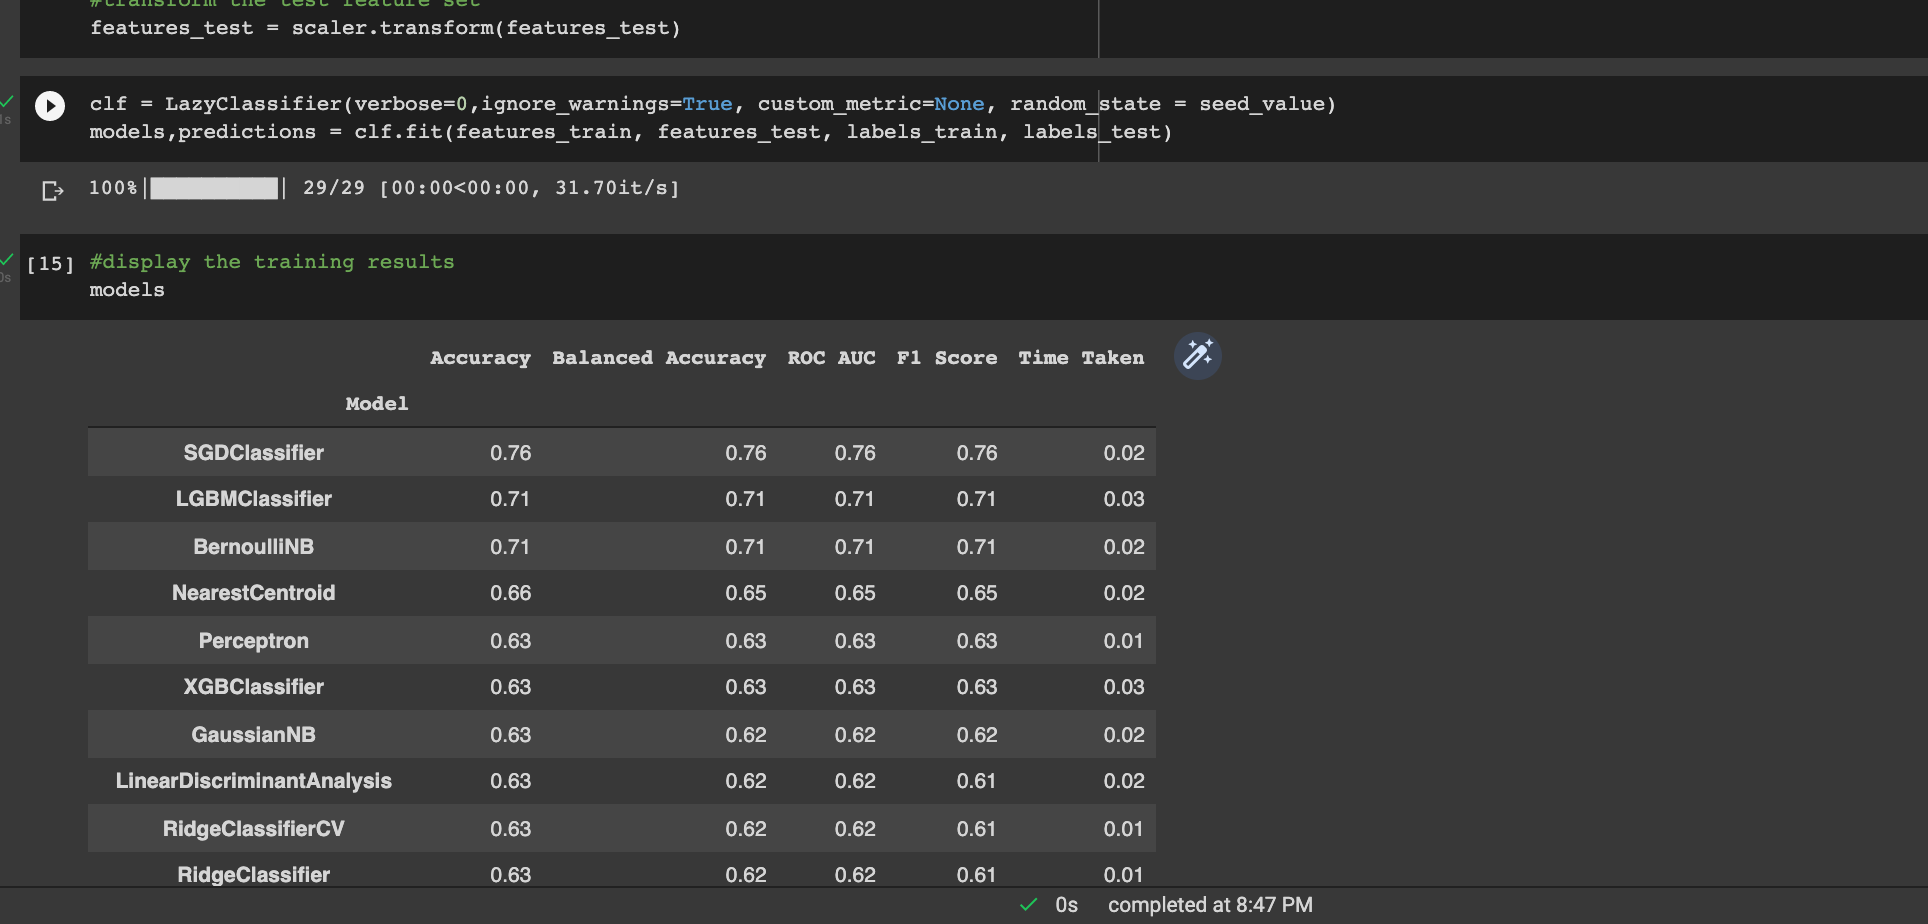

Based on the LazyClassifier results SGDClassifier seems like the best model for our data.

**Step 9. Train the SGDClassifier model.**

In [12]:
# Create object of SGDClassifier with random state value
mdl = SGDClassifier(random_state=seed_value)

# Train the model
mdl.fit(features_train, labels_train)

# Generate the predictions
prediction_sgd = mdl.predict(features_test)

print("Classification Report :\n")
print(classification_report(labels_test,prediction_sgd))

print("accuracy on test data",round(accuracy_score(labels_test,prediction_sgd) ,4)  * 100 , "%")

Classification Report :

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.76      0.80      0.78        20

    accuracy                           0.76        38
   macro avg       0.76      0.76      0.76        38
weighted avg       0.76      0.76      0.76        38

accuracy on test data 76.32 %


## Result Analysis Of Trained Model:

**Step 10. Lets analyze the results.**

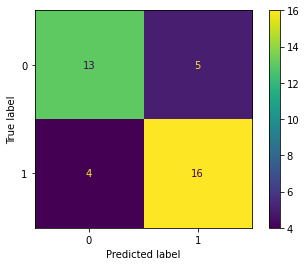

In [13]:
# Generate the confusion matrix
cm = confusion_matrix(labels_test, prediction_sgd)
#plot the confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

From the confusion matrix we can see the model is good at predicting both happy and unhappy customers. <br>

**Step 11. Now let's figure out which features are more important**

Feature: X1, Coef_: 10.90187
Feature: X2, Coef_: -1.11347
Feature: X3, Coef_: 1.71632
Feature: X4, Coef_: -1.20220
Feature: X5, Coef_: 2.31424
Feature: X6, Coef_: -3.28207


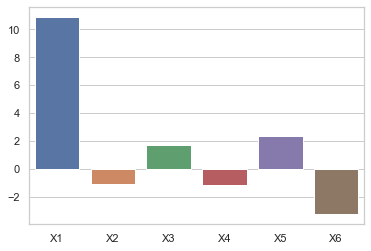

In [14]:
# Get the coefficient values
importance = mdl.coef_[0]
# Summarize feature importance
for i,v in enumerate(importance):
    feature = "X" +  str(i +1)
    print('Feature: %s, Coef_: %.5f' % ( feature,v))
    
# Plot the coefficients for analysis    
sns.set_theme(style="whitegrid")
ax= sns.barplot([ "X" +  str(x+1) for x in range(len(importance))],\
                importance , x="Features", y="Coefficient values")

## Conclusion:

Based on the coefficient values generated by model, we conclude <br>

i.) Feature X1(my order was delivered on time) is the most important factor in deciding if the customer will be happy  with the service provided.<br>
ii.) After feature X1, X5(I am satisfied with my courier) seems to be the most effective criteria in deciding the happiness of a customer.<br>
iii.) Feature X6(the app makes ordering easy for me ), i.e the ease of ordering with app is a feature which tends to make customer unhappy.

In [15]:
# Set the file name
file_name = 'finalized_model.pickle'
# Save the model 
pickle.dump(mdl, open(file_name, 'wb'))